# Dictionaries and Sets

**CS1302 Introduction to Computer Programming**
___

In [1]:
import random
import matplotlib.pyplot as plt
%reload_ext divewidgets

## Motivation for Dictionaries and Sets

Python Collections (Arrays)

There are four collection data types in the Python programming language:

- `List` is a collection which is ordered and changeable. Allows duplicate members.
- `Tuple` is a collection which is ordered and unchangeable. Allows duplicate members.
- `Dictionary` is a collection which is unordered, changeable and indexed. No duplicate members.
- `Set` is a collection which is unordered and unindexed. No duplicate members.

In this lecture, we will talk about `Dictionary` and `Set`.

The following code simulates the outcomes of rolling a die multiple times.

In [3]:
dice_rolls = [random.randint(1, 6) for i in range(10)]
print(*dice_rolls)

3 6 6 5 2 6 1 4 1 1


**What is the distribution, i.e., fractional counts?**

(0.0, 1.0)

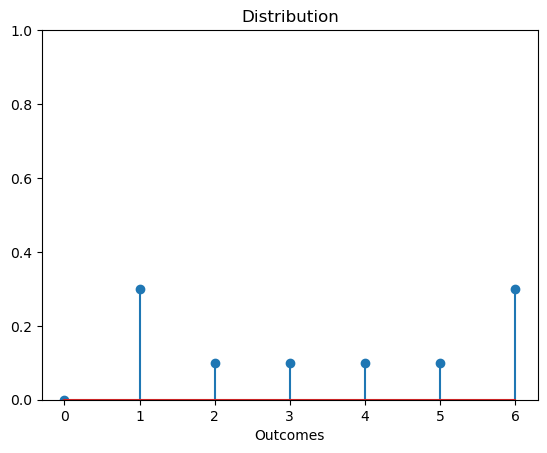

In [4]:
distribution = [dice_rolls.count(i) / len(dice_rolls) for i in range(7)]
plt.stem(range(7), distribution)
plt.xlabel("Outcomes")
plt.title("Distribution")
plt.ylim(0, 1)

In the above code, `distribution[i]` stores the fractional count of outcome `i`.

However, `distribution[0]` is `0` because a dice does not have outcome `0`. Can we avoid such redundancy?

(0.0, 1.0)

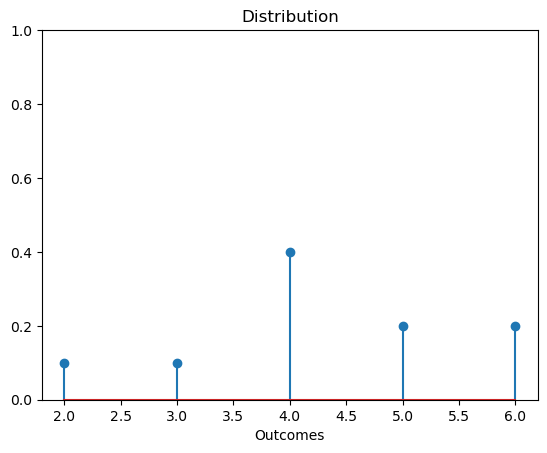

In [5]:
distinct_outcomes = [outcome for outcome in range(1, 7) if dice_rolls.count(outcome) > 0]
distribution = [dice_rolls.count(distinct_outcomes[i]) / len(dice_rolls) for i in range(len(distinct_outcomes))]

plt.stem(distinct_outcomes, distribution)
plt.xlabel("Outcomes")
plt.title("Distribution")
plt.ylim(0, 1)

In the above code, 
- `distinct_outcomes` stores the list of distinct outcomes, and
- `distribution[distinct_outcomes[i]]` stores the fractional count of the `i`-th distinct outcome.

What about finding the distribution of characters in an article?  
There are over 1 million unicode characters. Can we:
- Obtain the distribution efficiently without creating an entry for each unicode character?
- Compute the set of distinct characters efficiently without iterating over the set of all unicode characters?
- Access the fractional count of a particular character efficiently without searching through the list of distinct outcomes?
- Index `distribution` directly by the distinct characters in the article?

It is desirable to have a composite data type that
- can keep a set of *unique keys of different types* (such as the characters in our example), and
- associate to different keys possibly different *values of any types* (such as the fractional counts of the characters).

Such a data structure is called an [associative container](https://en.wikipedia.org/wiki/Associative_containers).

**How to use associative containers in python?**

```{important}

There are two built-in classes for associative containers:
- `dict`ionary can store a set of key-value pairs.
- `set` can store unique keys of possibly different types.
```

## Constructing dictionary/set

**How to create dictionary/set?**

Similar to tuple/list, we can use enclosure, constructors, and comprehension.

**How to create a dict/set by enumerating its keys/values?**

For `dict`, enclose a comma-separated sequence of `key : value` pairs by braces `{` and `}`.

In [6]:
%%optlite -h 350
empty_dictionary = {} #this creates an empty dictionary
a = {'a': 0, 'b': 1}  #this is how we create a dictionary
b = {**a, 'c': 0, 'd': 1}
#to access the elements of dictionary, we need to use ** to unpack it
#note it's different from another unpack operator *
#see what happends after running the following line
c1 = {*a} #c1 is a set which contains only the keys
c2 = {**a}
print(c1)
print(c2)

OPTWidget(value=None, height=350, script="empty_dictionary = {} #this creates an empty dictionary\na = {'a': 0…

For `set`, omit `: value`.

In [7]:
%%optlite -w 1200
a = {1,2,'Apple'}
empty_set = {*()} 
# Why not use {}?，because {} has already been defined to create an empty dictionary. 
#another way to create an empty set is set()

OPTWidget(value=None, script="a = {1,2,'Apple'}\nempty_set = {*()} \n# Why not use {}?，because {} has already …

We can also create a set/dictionary from other objects using their constructors `set`/`dict`.

In [8]:
%%optlite -h 550
empty_set = set()  #set() will create an empty set
string2set = set('abc')
range2set = set(range(2))
list2set = set(['abc',range(2)])
set2set = set(list2set)

OPTWidget(value=None, height=550, script="empty_set = set()  #set() will create an empty set\nstring2set = set…

 `enumerate()`
- enumerate() method assigns an index to each item in an iterable object that can be used to reference the item later.
- enumerate() returns an enumerate object
- enumerate(iterable, start=0)
    - iterable: any object that supports iteration
    - start: the index value from which the index is to be started, by default it is 0 

In [9]:
# Python program to illustrate enumerate function in loops
l1 = ["apple","banana","cherry"]

# print the tuples in object directly
for element in enumerate(l1):
    print(element)

# change index and print directly
for element in enumerate(l1,100):
    print(element)

# change index and print index and element separately
for index, element in enumerate(l1,100):
    print(index, element)

#we can't print the elements of an enumerate object directly, but we can use unpack operator * to unpack it
print(enumerate(l1))
print(*enumerate(l1))

(0, 'apple')
(1, 'banana')
(2, 'cherry')
(100, 'apple')
(101, 'banana')
(102, 'cherry')
100 apple
101 banana
102 cherry
(0, 'apple') (1, 'banana') (2, 'cherry')


In [9]:
%%optlite -h 650
empty_dict = dict() #this will create an empty dictionary
enumerate2dict = dict(enumerate('abc'))
zip2dict = dict(zip('abc','123'))
kwargs2dict = dict(one=1,two=2)
dict2dict = dict(kwargs2dict)

OPTWidget(value=None, height=650, script="empty_dict = dict() #this will create an empty dictionary\nenumerate…

`dict.fromkeys()`

* The fromkeys() method creates a dictionary with the specified keys and the specified value.
* Syntax: `dict.fromkeys(sequence, value)`
* fromkeys() method takes two parameters:

    * sequence - sequence of elements which is to be used as keys for the new dictionary
    * value (Optional) - The value for all keys. Default value is `None`


In [12]:
# Create a dictionary from a sequence of keys without specifying value

# vowels keys
keys = {'a', 'e', 'i', 'o', 'u'}

vowels = dict.fromkeys(keys)
print(vowels)

# Create a dictionary from a sequence of keys with value
keys = {'a', 'e', 'i', 'o', 'u' }
value = 1

vowels = dict.fromkeys(keys, value)
print(vowels)
#you may notice the order is not in 'a-e-i-o-u' because dictionary is unordered

{'a': None, 'o': None, 'e': None, 'i': None, 'u': None}
{'a': 1, 'o': 1, 'e': 1, 'i': 1, 'u': 1}


**How to use a rule to construct a set/dictionary?**

The following function uses a one-line dictionary comprehension to return the distribution of items in a sequence:

In [10]:
def distribute(seq):
    return {k : seq.count(k)/len(seq) for k in set(seq)}

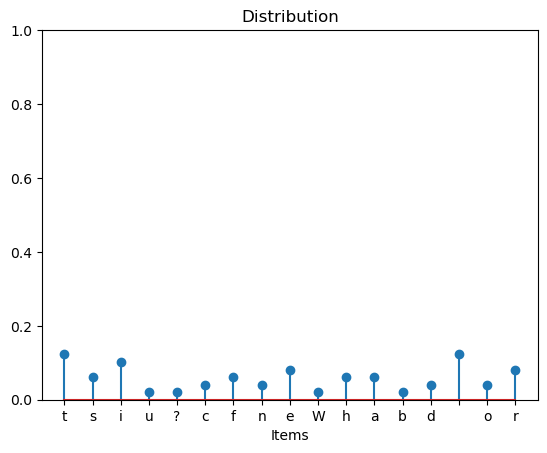

In [11]:
def plot_distribution(seq):
    dist = distribute(seq)
    plt.stem(
        dist.keys(),  # set-like view of the keys
        dist.values(),  # view of the values
    )
    plt.xlabel("Items")
    plt.title("Distribution")
    plt.ylim(0, 1)


plot_distribution("What is the distribution of different characters?")

The example above uses `dist.keys()`, `dist.values()`, to understand it, we need to introduce [Dictionary views](https://docs.python.org/3/glossary.html#term-dictionary-view)
* The objects returned from `keys()`, `values()`, and `items()` are called dictionary views. They provide a dynamic view on the dictionary’s entries, which means that when the dictionary changes, the view reflects these changes.
* The `keys()` method returns a view object. The view object contains the keys of the dictionary, as a list.
* The `values()` method returns a view object. The view object contains the values of the dictionary, as a list.
* The `items()` method returns a view object. The view object contains the key-value pairs of the dictionary, as tuples in a list.
* The view object will reflect any changes done to the dictionary, see example below.

In [16]:
#this example shows how to use keys(), values() and items()
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x=car.keys()
y=car.values()
z=car.items()
print('before change:')
print(x)
print(y)
print(z)

car['year']=1989
#note both y and z are updated
print('after change:')
print(x)
print(y)
print(z)  

before change:
dict_keys(['brand', 'model', 'year'])
dict_values(['Ford', 'Mustang', 1964])
dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 1964)])
after change:
dict_keys(['brand', 'model', 'year'])
dict_values(['Ford', 'Mustang', 1989])
dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 1989)])


`pop()` method removes and returns an element from a dictionary having the given key.

In [17]:
# this example shows how to use pop()
sales = { 'apple': 2, 'orange': 3, 'grapes': 4 }

element = sales.pop('apple')
print('The popped element is:', element)
print('The dictionary is:', sales) #note that the 'apple':2 is deleted

The popped element is: 2
The dictionary is: {'orange': 3, 'grapes': 4}


`popitem()` method removes and returns the last element (key, value) pair inserted into the dictionary.
- not the last element(key,value) pair you see, but the last element inserted. Dictionary is unordered, so different systems print the same dictionary in different orders. More precisely, `dict` is insertion-ordered since python 3.7.

In [11]:
person = {}

# inserting a new element pair
person['name'] = 'Phill'
person['age']=22
person['salary']=3500.0

print(person)

# ('salary,' 3500.0) is inserted at last, so it is removed.
result = person.popitem()

print('Return Value = ', result)
print('person = ', person)

{'name': 'Phill', 'age': 22, 'salary': 3500.0}
Return Value =  ('salary', 3500.0)
person =  {'name': 'Phill', 'age': 22}


`clear()` method removes all items from the dictionary.

In [18]:
d = {1: "one", 2: "two"}

d.clear()
print('d =', d)

d = {}


The following example shows how to use `keys()`, `values()`, `items()`, `pop()`, `popitem()`, `clear()`

In [19]:
%%optlite -h 500
a = dict(enumerate('abc'))
print(a.keys())
print(a.values())
print(a.items())
print(a.pop(1))    # remove the key 1 and its associated value
print(a.popitem()) # remove and return a key-value pair
print(a.clear())   # clear the dictionary

OPTWidget(value=None, height=500, script="a = dict(enumerate('abc'))\nprint(a.keys())\nprint(a.values())\nprin…

**now let's introduce some common methods in `set`**

`set` has `pop` and `clear` but not `popitem`. However, `set.pop` behaves like `dict.popitem` instead of `dict.pop`.

- `pop()` method removes a random item from the set.
   - why random? because set is unordered, i.e., {1,2,3} and {3,2,1} are the same set.
   - For example, you can run the following code [here](https://www.programiz.com/python-programming/online-compiler/), the poped item is different for each run.
   
- `clear()` method removes all elements in a set.

In [13]:
#set is unordered and unindexed, so we don't know which one is the first element, which one is the second element
#if you run this example in another Python system, the order may be different
#e.g., you can run this example here: https://www.programiz.com/python-programming/online-compiler/
x=set('abcdea')
print(x)

{'c', 'e', 'b', 'a', 'd'}


In [14]:
#this example shows how pop() works
fruits = {"apple", "banana", "cherry"}
fruits.pop()
print(fruits)

fruits.clear()
print(fruits)

{'banana', 'cherry'}
set()


In [23]:
#this example shows set and dictionary is unordered
set1={1,2,3}
set2={3,2,1}
dict1={'a':1,'b':2,'c':3}
dict2={'c':3,'b':2,'a':1}

print(set1==set2)
print(dict1==dict2)


#but tuple and list are ordered
list1=[1,2,3]
list2=[3,2,1]
tuple1=(1,2,3)
tuple2=(3,2,1)

print(list1==list2)
print(tuple1==tuple2)

True
True
False
False


In [15]:
%%optlite -h 250
a = set('abc')
a.pop()     # remove and return an element
a.clear()   # clear the set

OPTWidget(value=None, height=250, script="a = set('abc')\na.pop()     # remove and return an element\na.clear(…

## Hashability

what is [hashing](https://www.educative.io/edpresso/what-is-hashing)?
- `Hashing` is the process of converting a given key into another value.
- A `hash function` is used to generate the new value according to a mathematical algorithm.
- The result of a hash function is known as a `hash value` or simply, a `hash`.

**Why we need to introduce hashing in set and dictionary?** 
- the keys in dictionary must be hashable, see explanations below

For `set` and `dict`, 
- identical keys are merged to the same entry even though
- values associated with different keys can be the same.

In [16]:
%%optlite -h 350
a = {0: "a", 0.0: "b", 2: "b"}
b = {0j, 0, 0.0, "", False}
print(0 == 0.0 == 0j == False != "")

OPTWidget(value=None, height=350, script='a = {0: "a", 0.0: "b", 2: "b"}\nb = {0j, 0, 0.0, "", False}\nprint(0…

This is implemented efficiently by [*hashing*](https://docs.python.org/3/glossary.html#term-hashable). A key must be a hashable object which:

- has a hash value (returned by `__hash__` method) that never changes during its lifetime, and
- can be compared (using `__eq__` method) to other objects.  
  *Hashable objects which compare equal must have the same hash value.*

In [17]:
def hashable(obj):
    try:
        hash(obj)
    except Exception:
        return False
    return True


for i in 0, 0.0, 0j, "", False, (), [], {}, set(), frozenset(), ([],):
    if hashable(i):
        print("{} may be hashable. E.g., hash({!r}) == {}".format(type(i), i, hash(i)))
    else:
        print("{} may not be hashable.".format(type(i)))
        
#note the last object ([],) is a tuple whose element is a list. Since tuple is hashable, but list is not hashable, ([],) becomes not hashable

<class 'int'> may be hashable. E.g., hash(0) == 0
<class 'float'> may be hashable. E.g., hash(0.0) == 0
<class 'complex'> may be hashable. E.g., hash(0j) == 0
<class 'str'> may be hashable. E.g., hash('') == 0
<class 'bool'> may be hashable. E.g., hash(False) == 0
<class 'tuple'> may be hashable. E.g., hash(()) == 5740354900026072187
<class 'list'> may not be hashable.
<class 'dict'> may not be hashable.
<class 'set'> may not be hashable.
<class 'frozenset'> may be hashable. E.g., hash(frozenset()) == 133146708735736
<class 'tuple'> may not be hashable.


In [18]:
#if a data type is hashable, it can be used as key in a dictionary
dictionary1={1:"apple",2:"banana"} #int can be key
dictionary2={1.1:"apple",2.1:"banana"} #float can be key
dictionary3={"1":"apple","2":"banana"} #str can be key
dictionary4={(1,2):"apple",(2,3):"banana"} #tuple can be key
#dictionary5={[1,2]:"apple",[2,3]:"banana"} #list cannot be key because list may not be hashable
#dictionary6={dictionary1:"apple",dictionary2:"banana"} #dictionary cannot be key because dictionary may not be hashable
#dictionary7={{1,2}:"apple",{2,3}:"banana"} #set cannot be key because set may not be hashable

**Why the key should be hashable?**  
**What is the use of a hash value?**

Associative containers are implemented as *hash tables* for efficient lookup of key values.

In [19]:
%%html
<iframe width="800" height="450" src="https://www.youtube.com/embed/LPzN8jgbnvA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Most mutable objects are not hashable. Why?  
  Mutating a key makes it a different key, which is [hard to track](https://hynek.me/articles/hashes-and-equality/).

Some common immutable data types:
- int, float, bool, string, tuple

Some common mutable data types:
- list, dictionary, set

A tutorial on mutable and immutable can be found [here](https://towardsdatascience.com/https-towardsdatascience-com-python-basics-mutable-vs-immutable-objects-829a0cb1530a)

Some hashable data types:
- int, float, bool, string, tuple

Some common unhashable data types:
- list, dictionary, set

`set` has an immutable counterpart called `frozenset`, but `dict` does not have any immutable counterpart. Why?  
While elements of a set must be hashable and therefore mostly immutable, dictionary values may be of mutable types. 
- See examples below:

Python also uses dictionary for its global/local frames.  
Indeed, [hash collisions can slow down the lookup process](https://stackoverflow.com/questions/8271139/why-is-early-return-slower-than-else).

**Exercise** Why equal objects must have the same hash but different objects may have the same hash? An example is given below:

In [29]:
assert hash(0) == hash(0.0) == hash(0j) == hash(False) == hash("") and False != ""

1. 0==0.0==0j==False, so they have the same hash. This is to avoid duplicate keys occupying different entries in a hash table.
2. empty string "" != 0, 0.0, 0j, False, but they also have the same hash, this is called hash collisionHash collision can be detected by `==` and handled by [collision resolution](https://en.wikipedia.org/wiki/Hash_table#Collision_resolution) techniques. To keep the hash table small, hash collision is unavoidable.

`assert`

The `assert` keyword is used when debugging code.

The `assert` keyword lets you test if a condition in your code returns True, if not, the program will raise an AssertionError.

In [22]:
x = "hello"

#if condition returns True, then nothing happens:
assert x == "hello"

#if condition returns False, AssertionError is raised:
assert x == "goodbye"

AssertionError: 

**Exercise** Should an immutable object always be hashable?

No. Check the example below

In [37]:
#the value of an immutable object can still be changed if it points to a mutable object.
x = ([1,2,3],) #x is a tuple which is immutable, but its element is a list which is mutable
hashable(x) #so x is still not hashable

False

**Exercise** Can we use the `id` of an object as its hash value?

No because `id` remains unchanged even if the value of an object changes.

In [43]:
x=[1,2,3]
x_id=id(x)
print(x)
print(x_id)
x[0]=10
print(x)
print(x_id) #x_id remains the same, but the value of x is changed

[1, 2, 3]
139148349444160
[10, 2, 3]
139148349444160


**Short Summary**

The concept Hash may be hard to understand. What you need to know for this part is 

1. What is hashing, hash function, and hash values, and what are they used for?
2. Most mutable objects are not hashable. Most immutable object are hashable. But there are some exceptions.
2. The key in dictionaries must be hashable.

## Accessing keys/values

**How to traverse a set/dictionary?**

In [44]:
%%optlite -h 500
s = set("abcde")
d = dict(enumerate("abcde"))
print(*(element for element in s))
print(*((k, d[k]) for k in d))
s[0]  # TypeError

OPTWidget(value=None, height=500, script='s = set("abcde")\nd = dict(enumerate("abcde"))\nprint(*(element for …

```{note}

- `set` is not ordered.
- `dict` is insertion-ordered since python 3.7.
- `dict` is subscriptable. E.g., `d[k]` gives the value in dictionary `d` associated with key `k`.
- `set` does not implement [`__getitem__`](https://docs.python.org/3/reference/datamodel.html#object.__getitem__) and is therefore not subscriptable.
```

In [53]:
#this example shows how we can access elements in set/dictionary
fruits = {'apple','banana','cherry'}
price = {'apple': 3.2,'banana': 4.5,'cherry':6.8}
print('fruits =', fruits)
print('price =',price)

#we can use the loop to access its elements
for element in fruits:
    print(element)
for key in price:
    print(key,price[key])

#we can use dictionary_name[key_name] to access the values associated with key_name
print(price['apple'])
print(price['banana'])
print(price['cherry'])


#but we can't use index for the set because the set is unordered and unindexed
fruits[0]  # TypeError

fruits = {'cherry', 'apple', 'banana'}
price = {'apple': 3.2, 'banana': 4.5, 'cherry': 6.8}
cherry
apple
banana
apple 3.2
banana 4.5
cherry 6.8
3.2
4.5
6.8


TypeError: 'set' object is not subscriptable

- For the dictionary `price`, we used subscription `price[key]` to access the value associated with `key`.
- Unlike dictionary, set is unindexed and therefore not subscriptable.

**How to change the value of a key?**

we can enter a key value pair to a dictionary using the assignment operator.

In [45]:
#this example shows how we can change the value of elements in dictionary
fruits = {'apple','banana','cherry'}
price = {'apple': 3.2,'banana': 4.5,'cherry':6.8}
#we can insert a new key-value pair, then access it
price['watermelon'] = 1.2
print(price['watermelon'])
print(price)

#this is how we change the values
price['apple']=1
price['banana']=2
price['cherry']=3
price['watermelon']=4
print(price)

1.2
{'apple': 3.2, 'banana': 4.5, 'cherry': 6.8, 'watermelon': 1.2}
{'apple': 1, 'banana': 2, 'cherry': 3, 'watermelon': 4}


To delete a key, we can use the function `del`.

In [46]:
%%optlite -h 400
x = 5
d = {'a':x,'b':2}
del d['a']
d['a']  #x is still there, it's not deleted

OPTWidget(value=None, height=400, script="x = 5\nd = {'a':x,'b':2}\ndel d['a']\nd['a']  #x is still there, it'…

```{note}

`del d[k]` deletes the object reference at `d[k]`, not the object referenced by `d[k]`. 
```

To avoid key error, we can check if a key is in a dictionary efficiently (due to hashing) using the `in` operator.  
The following is a different implementation of `distribute`.

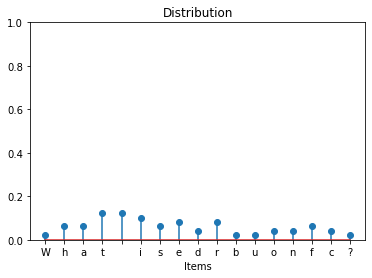

In [ ]:
def distribute(seq):
    dist = {}
    for i in seq: 
        dist[i] = (dist[i] if i in dist else 0) + 1/len(seq) #we use in operator to check whether i already exist or not
    return dist

plot_distribution('What is the distribution of different characters?')

`dict` also has a method [get](https://www.w3schools.com/python/ref_dictionary_get.asp) that conveniently returns a default value if the key does not exist.
- The `get()` method returns the value of the item with the specified key.
- Syntax: `get(keyname,value)`
   - keyname-required argument. The keyname of the item you want to return the value from
   - value-optional argument. A value to return if the specified key does not exist. Default value None

In [47]:
#This example shows how get() works
car = {
"brand": "Ford",
"model": "Mustang",
"year": 1964
}

#if key exist in the dictionary, get() will return its associated value
x = car.get("model")
print(x)

#if key doesn't exist in the dictionary, get() will return the specified argument
x = car.get("price", 15000)
print(x)

#if we don't specify the value, get() will return None
x = car.get("price")
print(x)

Mustang
15000
None


**How to traverse in ascending order of the keys?**

We can apply the function `sorted` to a set/dictionary to return a sorted list of the keys.

In [48]:
%%optlite -h 600
a = {'a','c','d','b','e'}
b = {3:'d',0:'a',2:'c',4:'e',1:'b'}
sorted_elements = sorted(a)
sorted_keys = sorted(b)

OPTWidget(value=None, height=600, script="a = {'a','c','d','b','e'}\nb = {3:'d',0:'a',2:'c',4:'e',1:'b'}\nsort…

**How to add an element to a `set` and remove an element from it?**

Instead of subscription, `set` has the `add`/`discard`/`remove` methods for adding/removing elements.
- The `add()` method adds a given element to a set. If the element is already present, it doesn't add any element.
- The `discard()` method removes a specified element from the set (if present).
- The `remove()` method removes the specified element from the set. 
   - If the element passed to remove() doesn't exist, KeyError exception is thrown.
   - You can use the set discard() method if you do not want this error. The discard() method removes the specified element from the set. However, if the element doesn't exist, the set remains unchanged; you will not get an error.



In [57]:
%%optlite -h 400
a = set('abc')
a.add('d')      
a.discard('a')  
a.remove('b')
a.clear()
a.discard('a')  # no error
a.remove('b')   # KeyError

OPTWidget(value=None, height=400, script="a = set('abc')\na.add('d')      \na.discard('a')  \na.remove('b')\na…

**Exercise** Use at most one comprehension in one line to return a set of composite numbers smaller than `stop`.  

```{hint}
You do not need to worry about duplicate elements for `set`.
```

In [ ]:
#this version uses comprehension
def composite_set(stop):
    #first include all multiples of 2: 2*2, 2*3, 2*4,... 
    #then include all multiples of 3: 3*2, 3*3, 3*4...
    return {x for factor in range(2,stop) for x in range(factor*2,stop,factor)}


#this version uses nested loop
def composite_set(stop):
    x={*()} #create an empty set
    for factor in range(2,stop):
        for i in range(factor*2,stop,factor):
            x.add(i)
    return x


print(*sorted(composite_set(100)))

4 6 8 9 10 12 14 15 16 18 20 21 22 24 25 26 27 28 30 32 33 34 35 36 38 39 40 42 44 45 46 48 49 50 51 52 54 55 56 57 58 60 62 63 64 65 66 68 69 70 72 74 75 76 77 78 80 81 82 84 85 86 87 88 90 91 92 93 94 95 96 98 99


## Other operators and methods

In [58]:
#str/tuple/list overloads operator + and *
list1=[1,2,3]
list2=[4,5,6]
print(list1*3)
print(list1+list2)

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[1, 2, 3, 4, 5, 6]


Unlike `str`/`tuple`/`list`, `set` and `dict` do not implement addition `+` and multiplication `*`:

So how to concatenate two sets/dictionaries?
* Use the unpacking operators `*` and `**` to concatenate two sets/dictionaries below into a new set/dictionary.

In [59]:
#this example shows how to concatenate two sets
#we use * to unpack a set
set1 = set('abc')
set2 = set('cde')
print(set1)
print(set2)

concatenated_set = {*set1,*set2}
print(concatenated_set)
#you may find the order is different from set1 and set 2, because set is unordered

{'c', 'b', 'a'}
{'c', 'd', 'e'}
{'c', 'd', 'e', 'b', 'a'}


In [ ]:
#this example shows how to concatenate two dictionaries
#we use ** to unpack a dictionary
dict1 = dict(enumerate('abc'))
dict2 = dict(enumerate('def',start=2))  
print(dict1)
print(dict2)
concatenated_dict = {**dict1,**dict2}
print(concatenated_dict)

{0: 'a', 1: 'b', 2: 'c'}
{2: 'd', 3: 'e', 4: 'f'}
{0: 'a', 1: 'b', 2: 'd', 3: 'e', 4: 'f'}


`set` overloads many other operators:
- more information can be found in Chapter 11.8 of the reference book

<center><figure>
<a title="Set operation" href="https://www.cs.cityu.edu.hk/~weitaoxu/cs1302/set_table.png"><img width="600" alt="Python set operations" src="https://www.cs.cityu.edu.hk/~weitaoxu/cs1302/set_table.png"></a>
  <figcaption></figcaption>
</figure>
</center>

<center><figure>
<a title="Set operation" href="https://www.cs.cityu.edu.hk/~weitaoxu/cs1302/set_table.png"><img width="600" alt="Python set operations" src="https://www.cs.cityu.edu.hk/~weitaoxu/cs1302/set_table2.png"></a>
  <figcaption></figcaption>
</figure>
</center>

In [49]:
%%optlite -h 550
a, b = {1,2}, {2,3}

union = a | b
print(union)

intersection = a & b
print(intersection)

symmetric_difference = a ^ b
print(symmetric_difference)


OPTWidget(value=None, height=550, script='a, b = {1,2}, {2,3}\n\nunion = a | b\nprint(union)\n\nintersection =…

For `set`, the intersection operation `&` can also be performed by
- the class method `intersection` which returns the intersection of its arguments, and
- the object method `intersection_update` which mutates a set object by intersecting the set with the arguments.

In [50]:
%%optlite -h 300
a = {0,1,2}
b = {1,2,3}
c = set.intersection(a,b,{2,3,4})
a.intersection_update(b,c) #this line is equivalent to a=set.intersection(a,b,c)

OPTWidget(value=None, height=300, script='a = {0,1,2}\nb = {1,2,3}\nc = set.intersection(a,b,{2,3,4})\na.inter…

Set-specific methods (see table below)
- we can use `class method`, `object method`, and `operator` to achieve the same purpose, but we need to note the difference

|     class method       |          object method        | operator     |
| ---------------------- | ----------------------------- | ------------ |
| `union`                | `update`                      | `\| `        |
| `intersection`         | `intersection_update`         | `&`          |
| `symmetric_difference` | `symmetric_difference_update` | `^`          |
| `issubset`             |                               | `<=`         |
| `issuperset`           |                               | `>=`         |
| `isdisjoint`           |                               |              |

In [52]:
a = {0,1,2}
b = {1,2,3}

#to calculate the union, we can use the class method like this
c1=set.union(a,b)
print(c1)
#we can use the object method like this
a.update(a,b)
print(a)
#we can also use the operator like this
c2=a|b
print(c2)

{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}


`dict` also has an [update()](https://www.programiz.com/python-programming/methods/dictionary/update) method that can update a dictionary using dictionary, iterables and keyword arguments:
- The `update()` method updates the dictionary with the elements from the another dictionary object or from an iterable of key/value pairs.

In [53]:
%%optlite -h 300
d = {1: "one", 2: "three"}
d1 = {3: "three",4:"four"}

# adds elements in d1 to d
d.update(d1)
print(d)

OPTWidget(value=None, height=300, script='d = {1: "one", 2: "three"}\nd1 = {3: "three",4:"four"}\n\n# adds ele…

The [copy()](https://www.programiz.com/python-programming/methods/dictionary/copy) method returns a shallow copy of the dictionary. It doesn't modify the original dictionary.
- [Shaddow copy vs deep copy](https://docs.python.org/3/library/copy.html)

In [54]:
%%optlite -h 300
original = {1:'one', 2:'two'}
new = original.copy()

print('Orignal: ', original)
print('New: ', new)

OPTWidget(value=None, height=300, script="original = {1:'one', 2:'two'}\nnew = original.copy()\n\nprint('Orign…

**Summary**

We introduce set and dictionary. You need to know

1. How to create, access, operate set and dictionary.
2. Hashability
3. Different methods of set and dictionary